In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt

# Use pandas to get some insights into the data

In [22]:
df_house = pd.read_csv('F:/Edyoda/machine learning/assignment data/house_rental_data.csv')

In [23]:
df_house.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [24]:
# check null values
df_house.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [25]:
#we dont need unnamed column so drop this column
new_df=df_house.drop(['Unnamed: 0'], axis=1)

In [26]:
new_df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [8]:
new_df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [27]:
new_df.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


In [9]:
# To check duplicate values
new_df.duplicated().sum()

66

In [11]:
# To drop duplicate values
new_df=new_df.drop_duplicates()

In [12]:
new_df.duplicated().sum()

0

In [35]:
# splitting data
y = new_df['Sqft']
X = new_df.drop(['Price'], axis=1)
#X=new_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [36]:
print("x_train shape :",X_train.shape)
print("x_test shape : ",X_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

x_train shape : (432, 6)
x_test shape :  (213, 6)
y_train shape : (432,)
y_test shape : (213,)


In [37]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [38]:
# Linear Regression

lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression()

In [39]:
# predictions

lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)

In [40]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})

Linear Regression Performance:

all features, No scaling:
MAE: 1.4144137087431103e-14
RMSE: 4.319594154436464e-14
R2_Score:  1.0

all features, with scaling:
MAE: 111.6400221048514
RMSE: 120.88991092083127
R2_Score:  0.9728456491112633


<ipython-input-40-d6cf9cea014f>:13: RuntimeWarning: overflow encountered in exp
  pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})
C:\Users\sushma\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


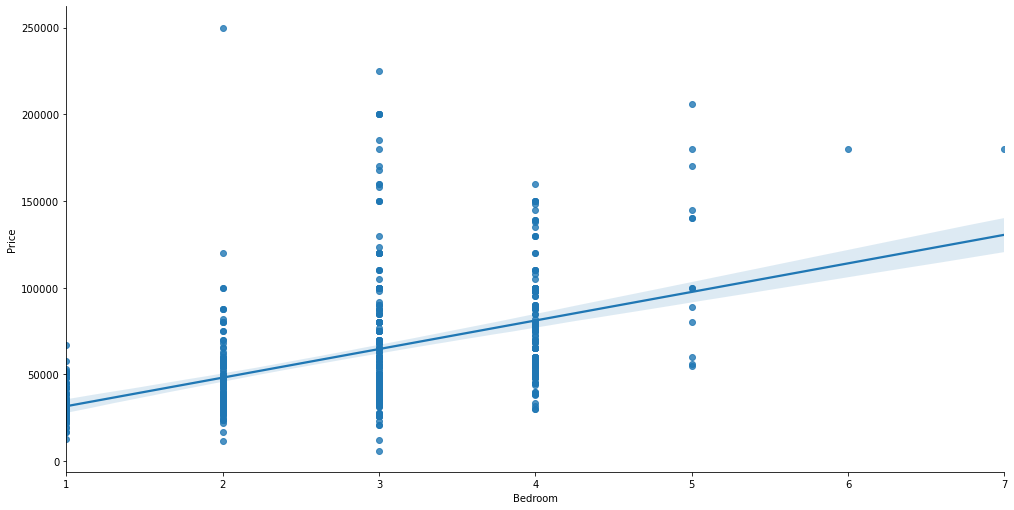

In [42]:
b=sns.lmplot(x='Bedroom', y='Price', data=new_df, aspect=2, height=7,)
b

<ipython-input-43-fb9c1a253666>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


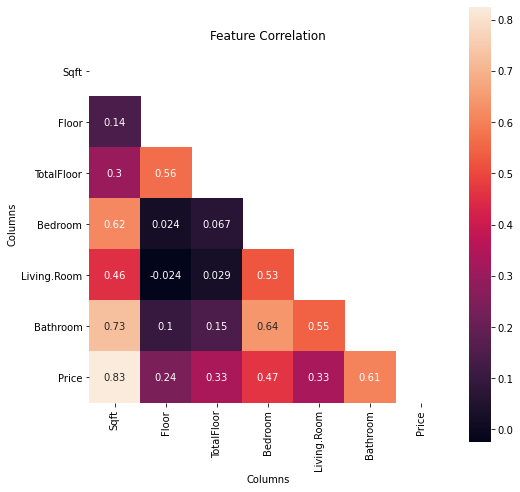

In [43]:
corr_matrix = new_df.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

fig, ax = plt.subplots(figsize=(8,8)) 

sns.heatmap(corr_matrix, 
            annot=True, 
            square=True,
            fmt='.2g',
            mask=mask,
            ax=ax).set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

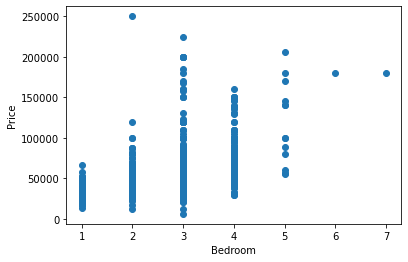

In [44]:
plt.scatter(new_df.Bedroom, new_df.Price)
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.show()

<AxesSubplot:>

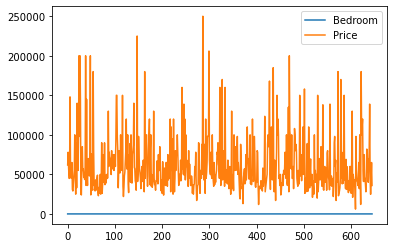

In [45]:
a = new_df.loc[:, ['Bedroom', 'Price']]
a.plot()

C:\Users\sushma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sushma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sushma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Floor'>

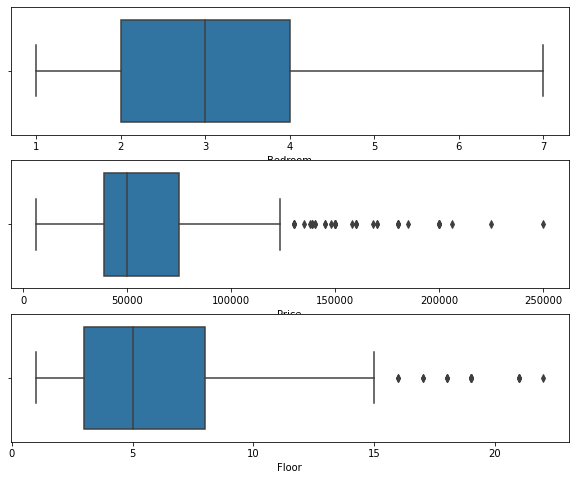

In [46]:
fig, axs = plt.subplots(3, figsize = (10,8))
sns.boxplot(new_df['Bedroom'], ax = axs[0])
sns.boxplot(new_df['Price'],  ax = axs[1])
sns.boxplot(new_df['Floor'],  ax = axs[2])

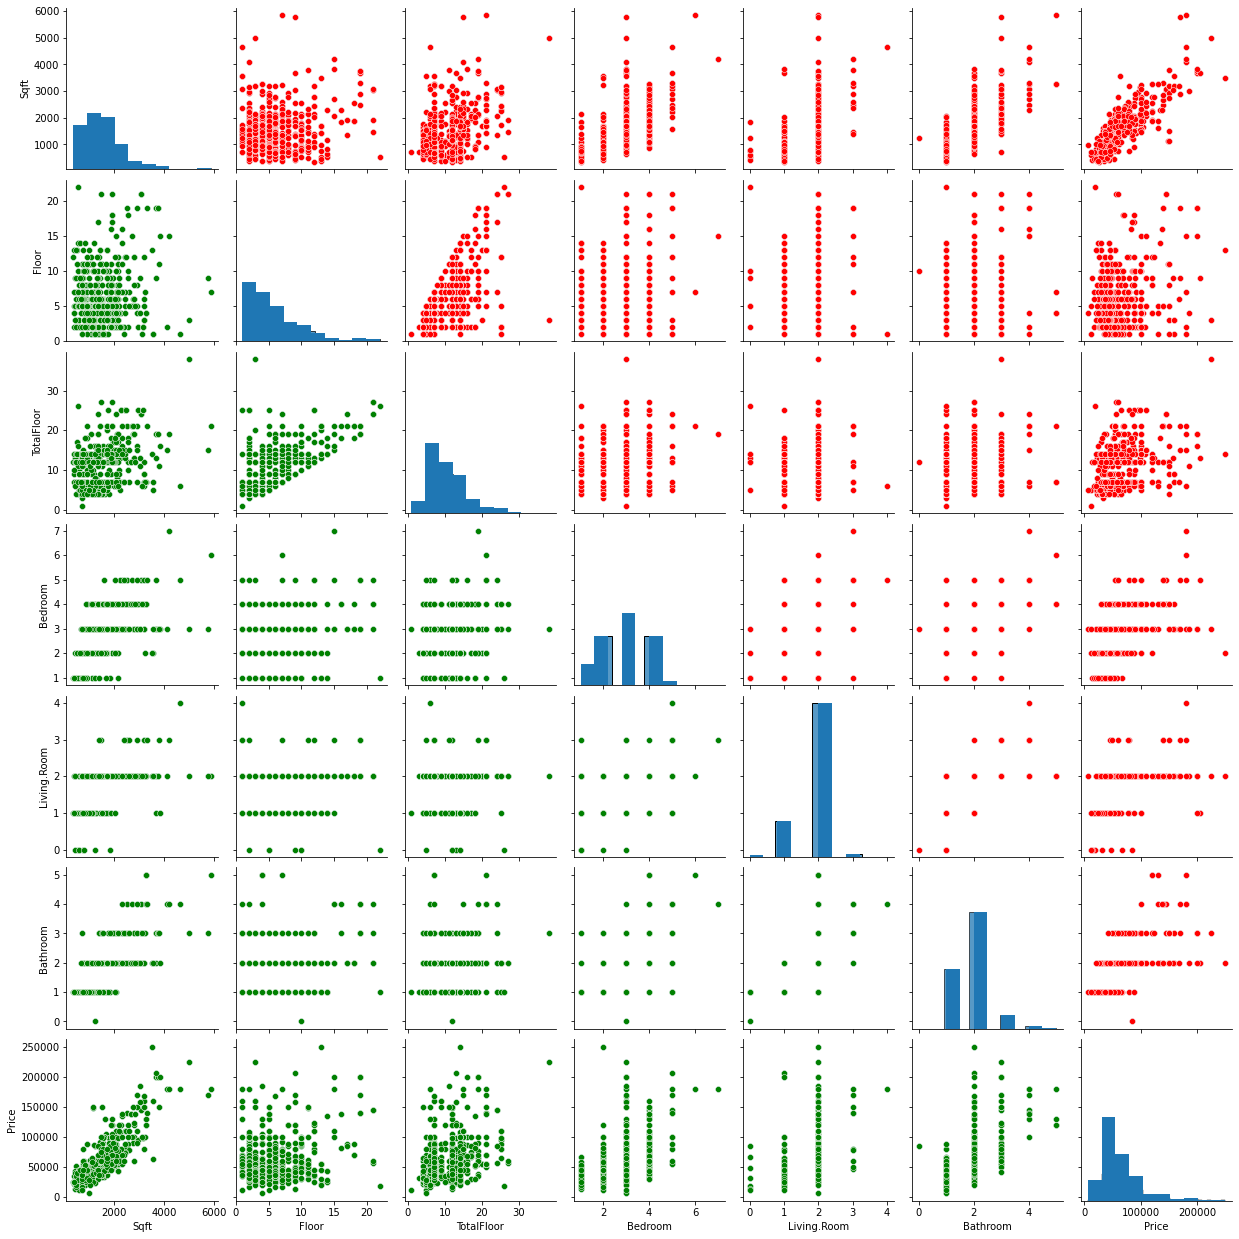

In [47]:
b=sns.pairplot(new_df)

b.map_upper(sns.scatterplot,color='red')
b.map_lower(sns.scatterplot, color='green')
b.map_diag(plt.hist)